Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Saydasheva Alina"
COLLABORATORS = ""

---

# Интерполяция при помощи полиномов Лагранжа.

In [2]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        s = 0.
        n = len(self.xk)
        
        for i in range(n):
            result = 1.
            for j in range(n):
                if i == j:
                    continue
                num = x - self.xk[j]
                den = self.xk[i] - self.xk[j]
                result *= num / den
            s += result * self.yk[i]
        return s

In [3]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


In [4]:
import matplotlib.pyplot as plt

def chebyshev_nodes(a, b, n):
    return [1/2*(a + b) + 1/2*(b - a)*np.cos(np.pi * (2*k - 1) / (2*n)) for k in range(1, n + 1)]

NameError: name 't' is not defined

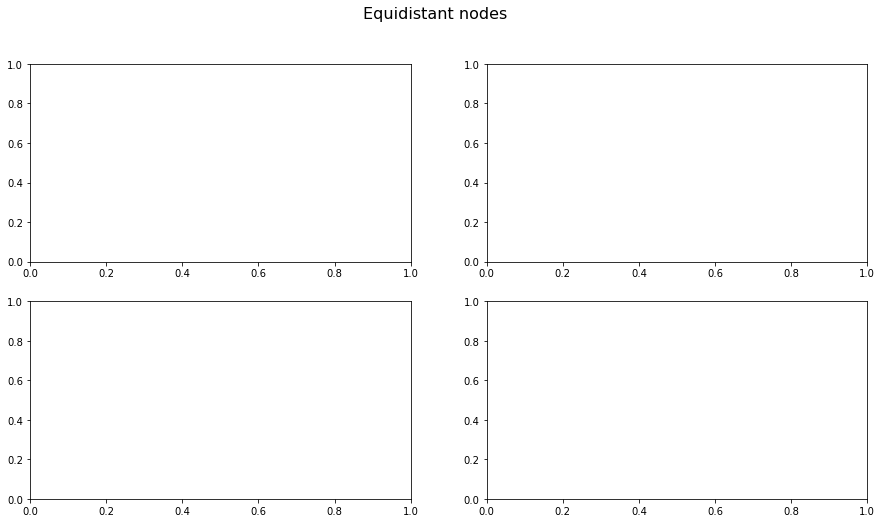

In [5]:
fig, ax = plt.subplots(2, 2, figsize = (15, 8))
fig.suptitle('Equidistant nodes', fontsize = 16)

for i, m in enumerate([3, 5, 7, 11]):
    ax[i//2, i%2].plot(t, runge_func(t), 'r', label = 'given function')
    nodes = np.linspace(-2, 2, m)
    lagr = LagrangeInterpolator(nodes, runge_func(nodes))
    
    ax[i//2, i%2].plot(nodes, runge_func(nodes), 'ro')
    ax[i//2, i%2].plot(t, [lagr(x) for x in t], '--', label = 'interpolation')
    ax[i//2, i%2].legend()
    ax[i//2, i%2].set_title(f'Number of nodes: {m}')

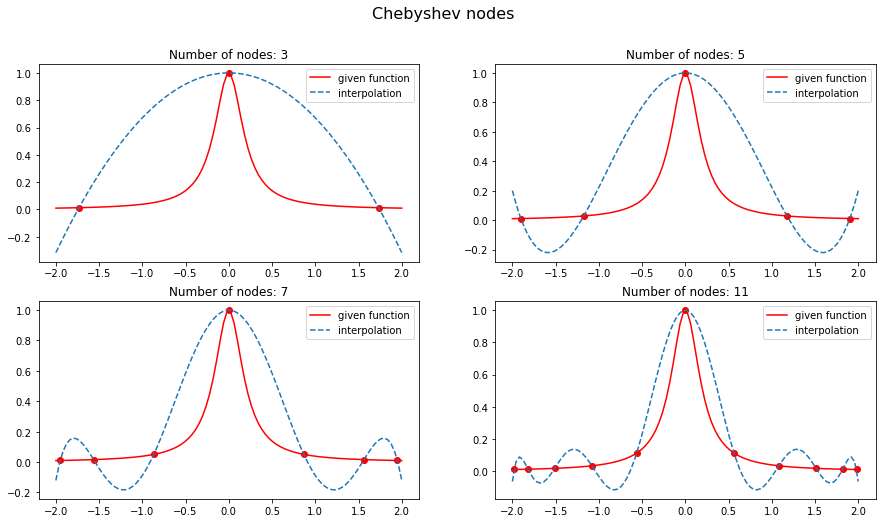

In [6]:
t = np.linspace(-2, 2, 100)

fig, ax = plt.subplots(2, 2, figsize = (15, 8))
fig.suptitle('Сhebyshev nodes', fontsize = 16)

for i, m in enumerate([3, 5, 7, 11]):
    ax[i//2, i%2].plot(t, runge_func(t), 'r', label = 'given function')
    nodes = np.array(chebyshev_nodes(-2, 2, m))
    lagr = LagrangeInterpolator(nodes, runge_func(nodes))
    
    ax[i//2, i%2].plot(nodes, runge_func(nodes), 'ro')
    ax[i//2, i%2].plot(t, [lagr(x) for x in t], '--', label = 'interpolation')
    ax[i//2, i%2].legend()
    ax[i//2, i%2].set_title(f'Number of nodes: {m}')